In [3]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

In [4]:
drive.mount('/content/drive')

#
file_path = '/content/drive/MyDrive/datasets/train.csv'

df = pd.read_csv(file_path)

#first five rows
df.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The data

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 the data has 891  rows and 13  columns



# First let's clean the data

first we will drop all Nan values or empty values:

A very important part of the process is to clean the data so that it can be used for our prediction models and also to improve the direction we are going in the project. So let's clean up our data to fit our project

what will happen if we will delete rows with missing data:

In [6]:
df_no_nan=df.copy()
df_no_nan.dropna(axis=0,how='any',subset=None,inplace=True)

In [7]:
df_no_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


now this is not good. we dont want to delete the nan values, we will be ledt only with 183 rows(samples) so we will deal with that later and for now we will keep all the rows.

we will check if there are duplicated rows

In [8]:
df[df.duplicated()].shape[0]

0

so tehre isnt

### now lets go to the EDA

# **Visualising The Data**

Visualization using graphs can teach us a lot about our data. In this part we will try to understand what is in our data by means of different graphs and deduce from it things that can help us in the future and even others in the future who want to buy or sell a car.

lets see the dostubution of the ages for astart

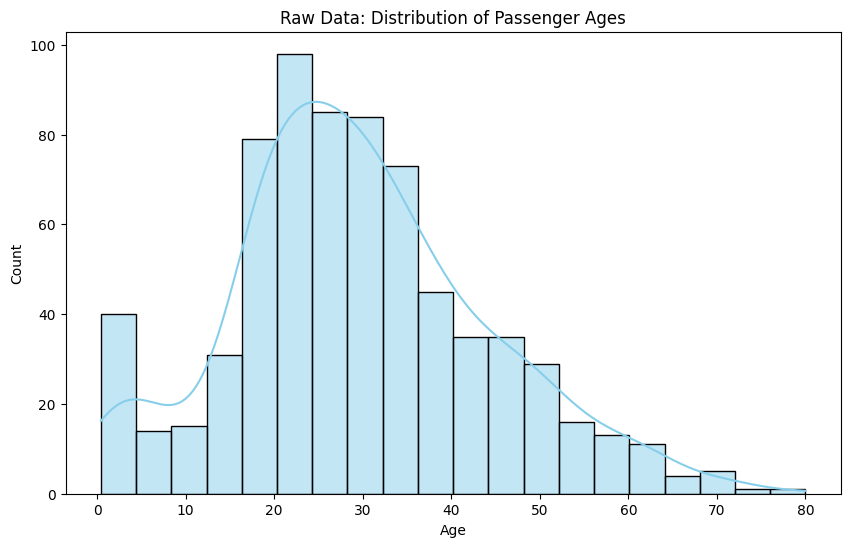

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Raw Data: Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

we see that most of the people is around 20-40 and some babies

now i will show both grpah that later in the preprocess we will do something with them:

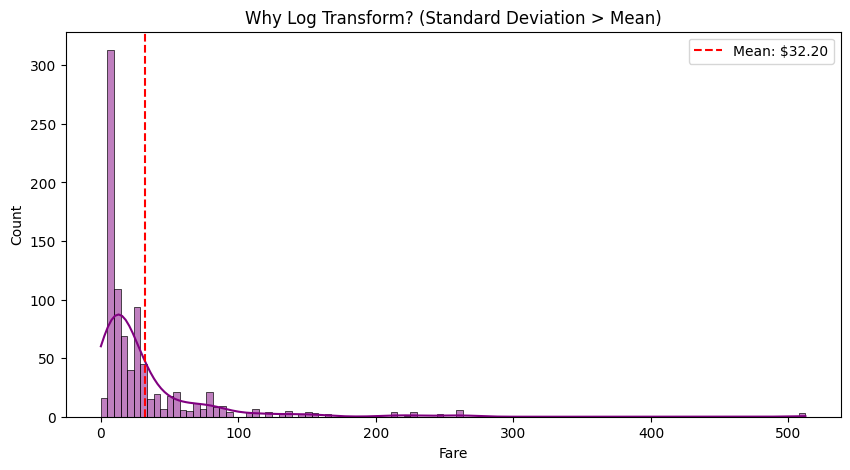

/tmp/ipython-input-1528512130.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette=['green', 'red'])


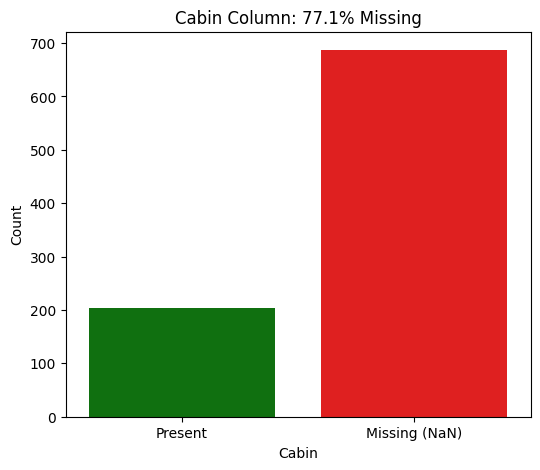

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. fare Distribution (Why we use Log)
plt.figure(figsize=(10, 5))
# I am using the data you pasted to show the real distribution
sns.histplot(df['Fare'], kde=True, color='purple')
plt.axvline(df['Fare'].mean(), color='red', linestyle='--', label=f"Mean: ${df['Fare'].mean():.2f}")
plt.title('Why Log Transform? (Standard Deviation > Mean)')
plt.legend()
plt.show()

# 2. cabin Missing Values (Why we Delete)
missing_counts = df['Cabin'].isnull().value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette=['green', 'red'])
plt.xticks([0, 1], ['Present', 'Missing (NaN)'])
plt.title(f"Cabin Column: {df['Cabin'].isnull().mean():.1%} Missing")
plt.ylabel('Count')
plt.show()

just to say that a lot if values are missing and the std of the fare is high so we will deal with that later

now most of the data is from southampton but we will see if that effect us

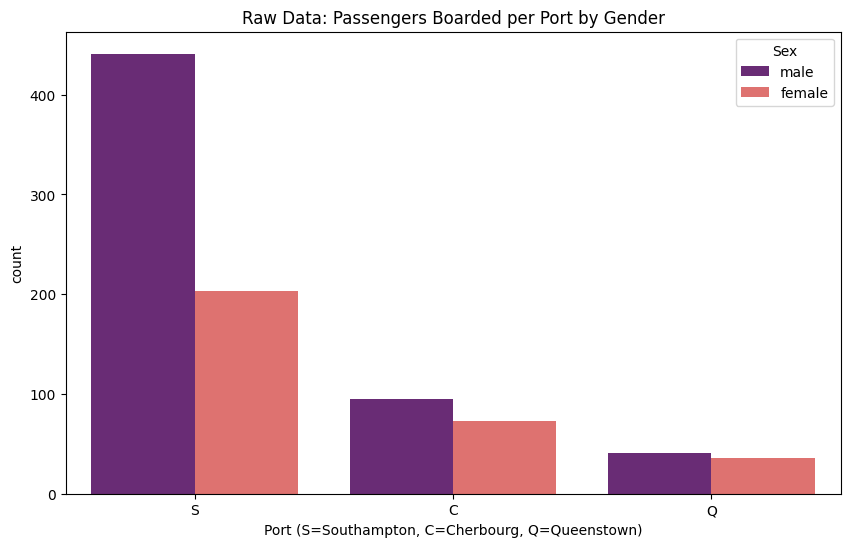

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Sex', data=df, palette='magma')
plt.title('Raw Data: Passengers Boarded per Port by Gender')
plt.xlabel('Port (S=Southampton, C=Cherbourg, Q=Queenstown)')
plt.show()

intresing to see what are the ages from each port

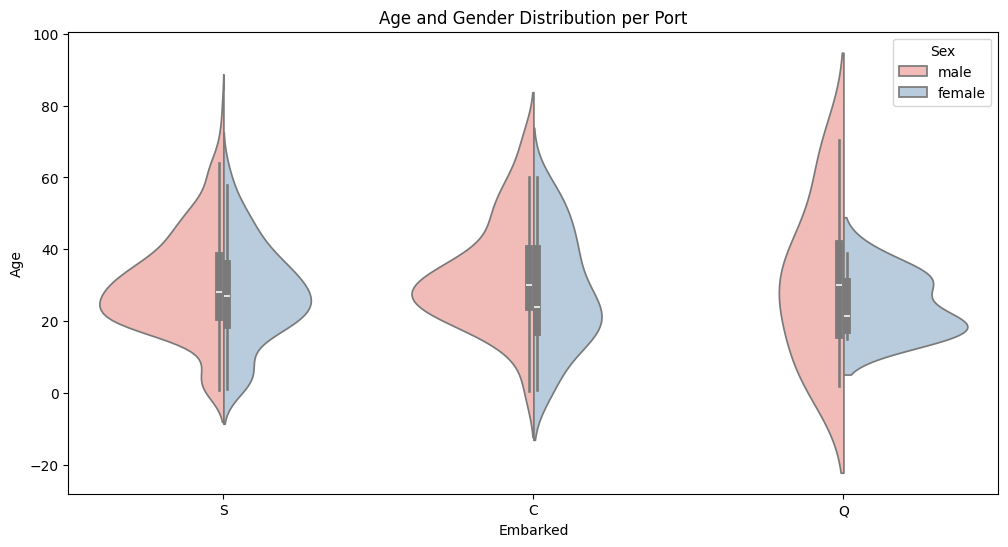

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Embarked', y='Age', hue='Sex', data=df, split=True, palette='Pastel1')
plt.title('Age and Gender Distribution per Port')
plt.show()

now for some more informative grpahs from the data

/tmp/ipython-input-1186785258.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, ax=axes[0], palette='viridis')
/tmp/ipython-input-1186785258.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ax=axes[1], palette='magma')
/tmp/ipython-input-1186785258.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[2], palette='plasma')


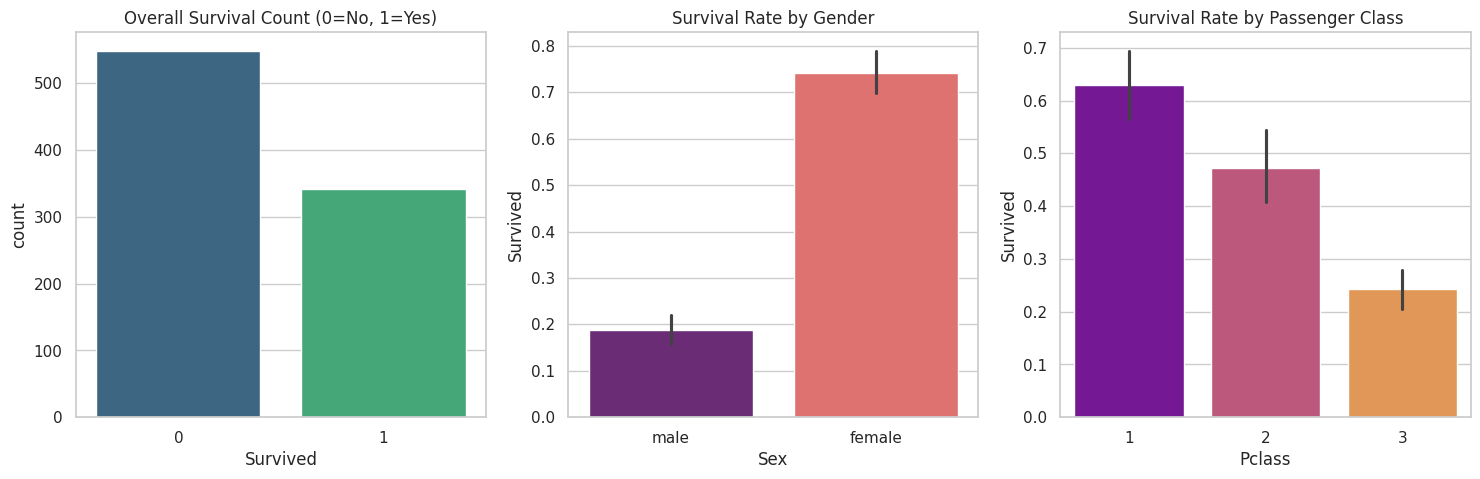

In [13]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. urvival count
sns.countplot(x='Survived', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Overall Survival Count (0=No, 1=Yes)')

# 2. survival by sex
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Survival Rate by Gender')

# 3. by Class
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[2], palette='plasma')
axes[2].set_title('Survival Rate by Passenger Class')

plt.show()

we see that there are more people that did not survived(later in the model we will try to use weight random sampler if it will help or use some weight in the loss func)

also most of the survivals are women and most of the survivals are fro, class 1.

why most of the "rich" people are the one to survive?!

anohter intresting thing is to find what  are the ages that survived.

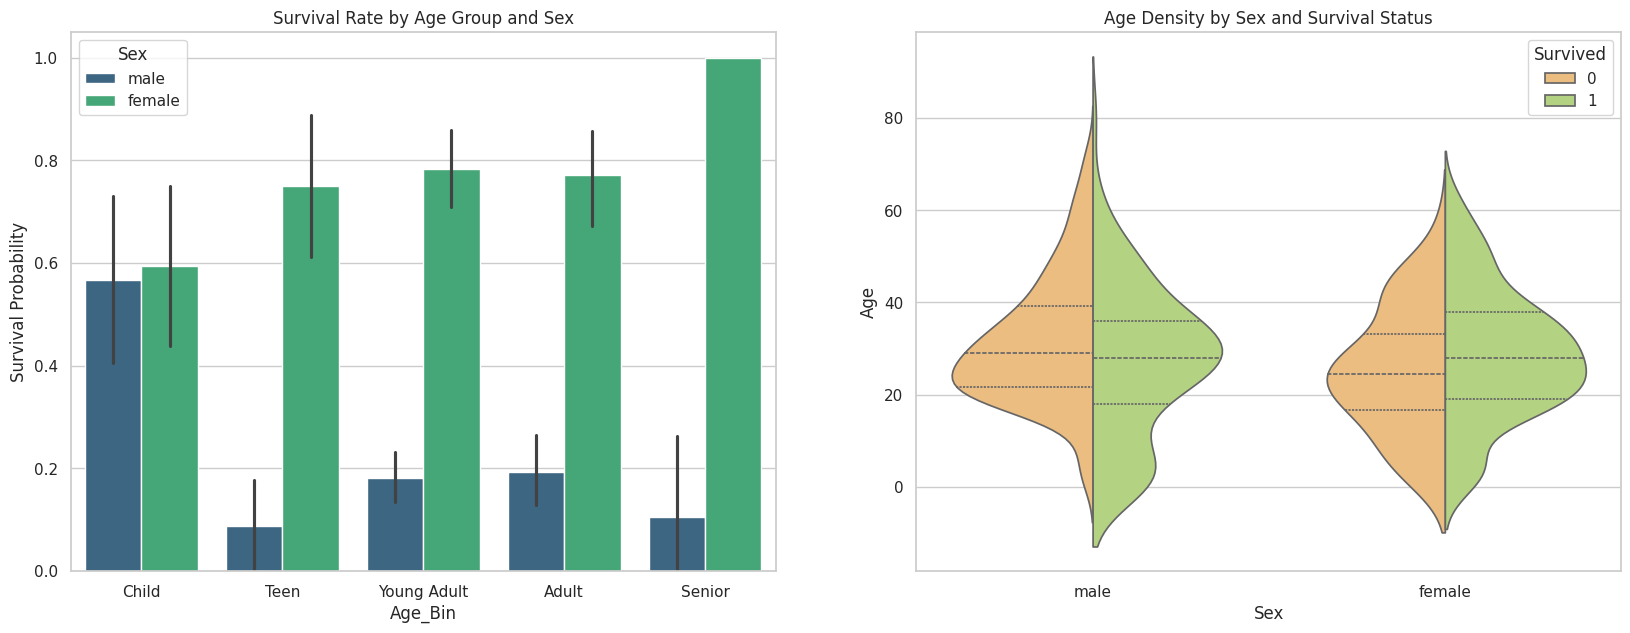

In [14]:


# 1. age Bins
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['Age_Bin'] = pd.cut(df['Age'], bins=bins, labels=labels)

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.barplot(data=df, x='Age_Bin', y='Survived', hue='Sex', palette='viridis', ax=axes[0])
axes[0].set_title('Survival Rate by Age Group and Sex')
axes[0].set_ylabel('Survival Probability')

sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True, inner="quart", palette='RdYlGn', ax=axes[1])
axes[1].set_title('Age Density by Sex and Survival Status')

plt.show()

Age & Sex vs. Survival: We saw that females have a massive survival advantage across almost every age bin. However, for males, age is the deciding factor. Children (under 12) have a much higher survival rate than adult men, confirming that the "Women and Children First" rule was physically enacted.

The "Violin" Density: The wide "belly" of the male non-survivor plot shows that the Titanic's biggest loss of life was men aged 18–35.

now if a person had parents or children, did it help him?

/tmp/ipython-input-1525370377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=df, palette='Greens_d', errorbar=None)


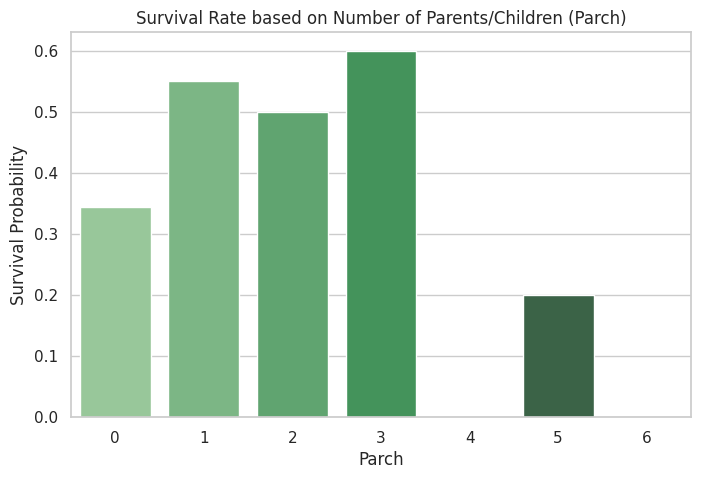

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Parch', y='Survived', data=df, palette='Greens_d', errorbar=None)
plt.title('Survival Rate based on Number of Parents/Children (Parch)')
plt.ylabel('Survival Probability')
plt.show()

soo what we see?:

Small Families Win: we notice a "peak" in survival for people with 1 to 3 family members (parents/children).

The "Alone" Penalty: People with Parch = 0 (traveling without parents or children) usually have a lower survival rate than those with a small family.

The "Large Family" Trap: Once Parch gets to 4, 5, or 6, survival rates crash. In a crisis, it is much harder to coordinate and save a large group than a small one.

same for siblings/ spuses

/tmp/ipython-input-3049505039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=df, palette='Blues_d', errorbar=None)


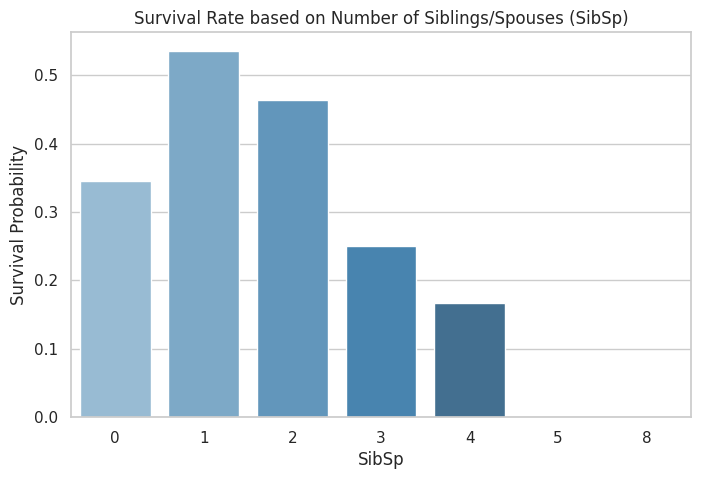

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=df, palette='Blues_d', errorbar=None)
plt.title('Survival Rate based on Number of Siblings/Spouses (SibSp)')
plt.ylabel('Survival Probability')
plt.show()

Similar Trend: Just like Parch, having 1 or 2 siblings/spouses increases your chances compared to being completely alone.

Why 1 is better than 0? Being alone means you have no one to help you or wake you up, but having a spouse or sibling means you have a partner in survival.

Large Groups: Again, if you have 3, 4, 5, or 8 siblings/spouses, the survival rate drops significantly. Large families in the 3rd class were often unable to reach the lifeboats together.

money? does it help?

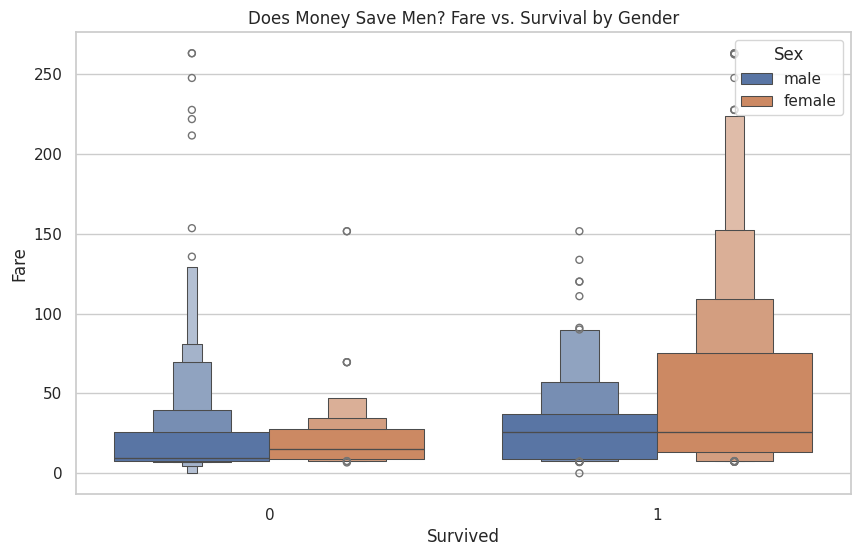

In [17]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Survived', y='Fare', hue='Sex', data=df[df['Fare'] < 300])
plt.title('Does Money Save Men? Fare vs. Survival by Gender')
plt.show()

The "Rich Man" Effect: If we look at the "Male" category, the survivors (1) generally have a higher "Fare" distribution than the non-survivors (0). Yes, men who paid more had a better chance, likely because they were in 1st Class and maybe it was closer to the deck or they went out first

The Gender Trump Card: However, even "poor/low fare women often have a higher survival probability than rich/highh fare men. so as we know onn the Titanic the class helped you get a spot, but!! the gende r was the ultimate deciding factor

correlation Heatmapp:

which features move together? If two features have a high correlation (like we seecSibSp and Parch), it in this case maybe a good idea to combian them to family column to simplify the model!/

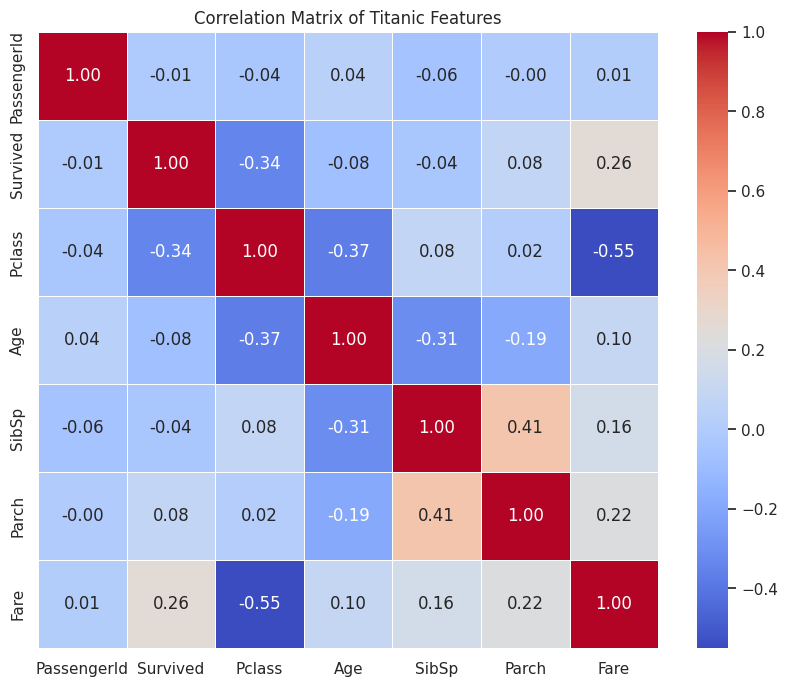

In [18]:
plt.figure(figsize=(10, 8))
# we only use numerical columns for correlation
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Titanic Features')
plt.show()

we see something strong, pcalss and survival are correlated

and alsoe the relationship between SibSp and Parch. Since they are both about family, they correlate.

and the thing that make sense is the fare and the class which are correlated - but why -0.55 and not 0.55, well maybh becuase that high price mean the first class and low price mean the 3rd class

FacetGrid (Class vs. Sex vs. Age):

This graph is the exaplnation of the Titanic. It shows that survival wasn't just about one thing. likee 3rd Class women survived at much higher rates than 1st Class men in certain age groups.

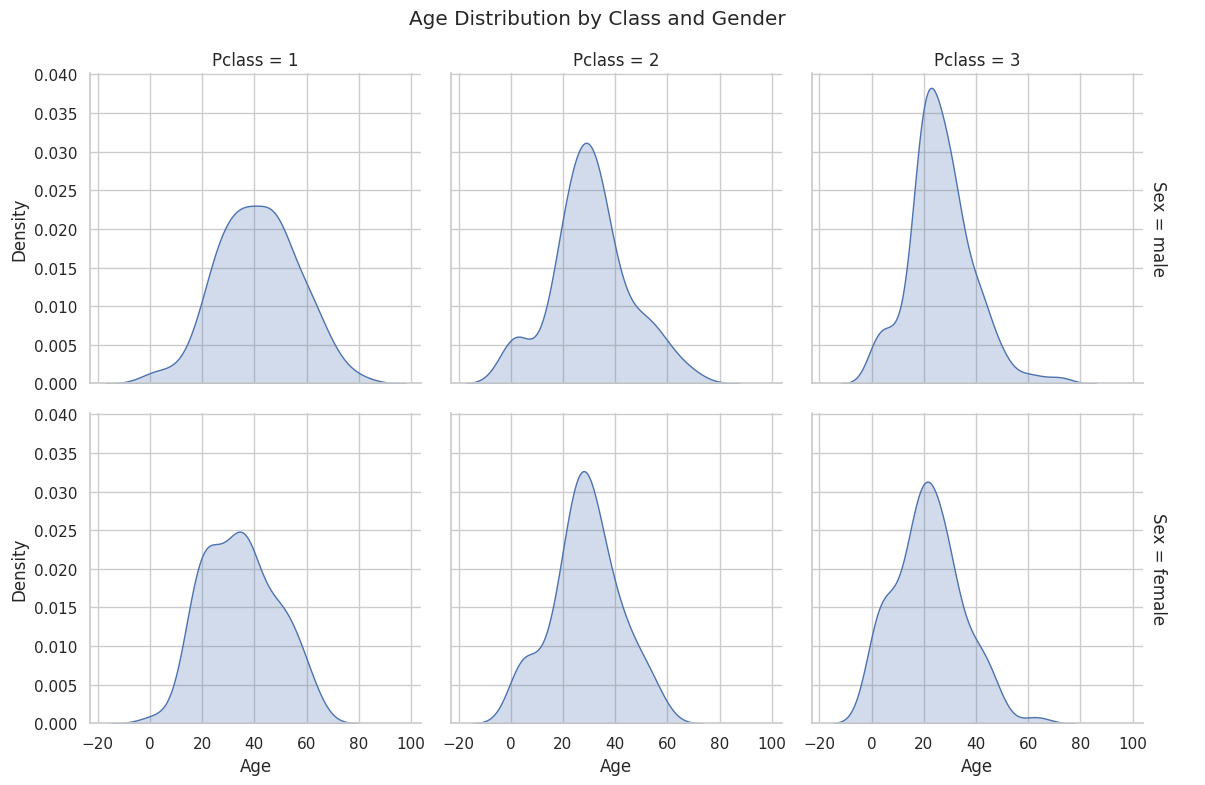

In [19]:
g = sns.FacetGrid(df, col='Pclass', row='Sex', margin_titles=True, height=4)
g.map(sns.kdeplot, 'Age', fill=True)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Class and Gender')
plt.show()

The 3rd Class men had the lowest survival rates.

Class Disparity: Compare the 1st class female distribution to the 3rd class. The "shape" of the survivors is much broader in higher classes, meaning age mattered less if you were wealthy and female.

Missing Data Map:

 It shows you that Cabin is too empty to use without a lot of work, and Age needs a smart fix (imputation) before any machine learning can happen.

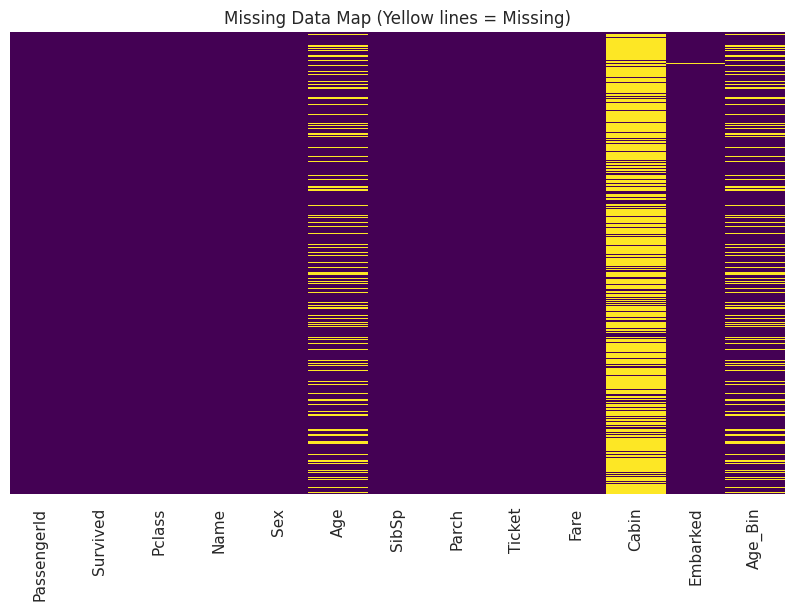

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Map (Yellow lines = Missing)')
plt.show()

so for theCabin: a lot of yellow. so almost usless

Age: The yellow lines are scattered. This confirms we need a smart way to fill (impute) these ages, like using the "Title" method I mentioned earlier.


Bubble Plot (Age/Fare/Class):

This captures the "Individual Profile." It shows that the "Safest" profile was a wealthy child, and the "Riskiest" was an older, lower-class male.

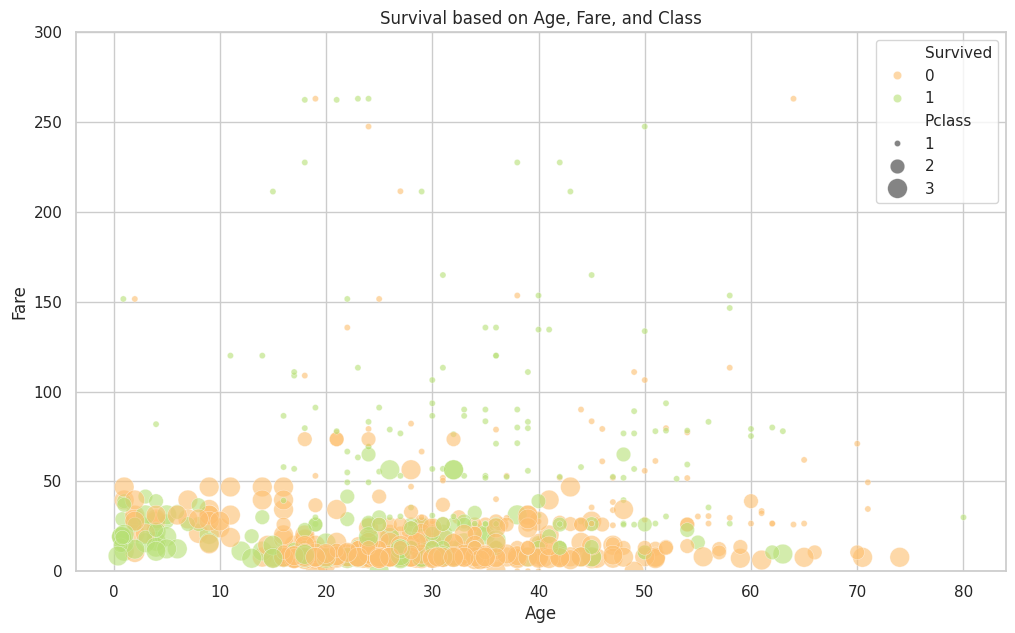

In [21]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', size='Pclass',
                sizes=(20, 200), alpha=0.6, palette='RdYlGn')
plt.ylim(0, 300)# not extreme values so gprah is better seen
plt.title('Survival based on Age, Fare, and Class')
plt.show()

the "Safety Zone": cluster on the far left (low age). which make sense they pay less and high chance to survive
also the "Danger Zone": The bottom right of the graph (older people with low fares)

lets call them the Outliers: the people  who paid over $200 so most of them survived, regardless of age

# PCA

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].copy()

#WE WILL DO JUST A simple Preprocessing for PCA:
pca_df['Sex'] = pca_df['Sex'].map({'male': 0, 'female': 1})
pca_df['Age'] = pca_df['Age'].fillna(pca_df['Age'].median())
pca_df['Fare'] = pca_df['Fare'].fillna(pca_df['Fare'].median())

# 2. separate Features (X) and Target (y)
X = pca_df.drop('Survived', axis=1)
y = pca_df['Survived']

# 3. scaling (THE MOST IMPORTANT STEP FOR PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_result = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])
pca_result['Survived'] = y.values

pca.explained_variance_ratio_


array([0.29935785, 0.28047506])

The pca.explained_variance_ratio_ tells us how much of the original dataset's "information" (variance) is captured by each of the new Principal Components.

PC1 (29.9%): The first component captures nearly 30% of the total variance in the Titanic dataset. This is the single most important "direction" in our data, it likely represents the huge gap between 1st class females and 3rd class males.

PC2 (28.0%): The second component captures another 28% of the information. This usually represents a different set of patterns, like Age and Family size.

Total (57.9%): Together, these two numbers mean that by using only two columns instead of the original six or seven, we are still keeping about 58% of the total information. Thats a massive simplification of the data with a relatively small loss of detail!

plot

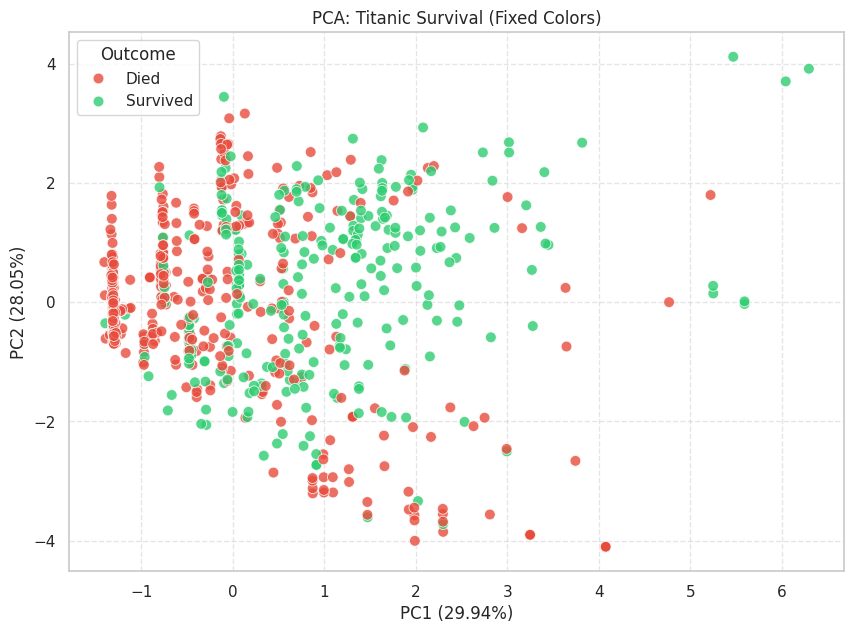

In [23]:
pca_result['Survived'] = pca_result['Survived'].astype(str).map({'0': 'Died', '1': 'Survived'})

plt.figure(figsize=(10, 7))

sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Survived',
    data=pca_result,
    palette={'Died': '#e74c3c', 'Survived': '#2ecc71'}, # Red for Died, Green for Survived
    alpha=0.8,
    edgecolor='w',
    s=60
)

plt.title('PCA: Titanic Survival (Fixed Colors)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Outcome')
plt.show()

In this visualization, I used Principal Component Analysis (PCA) to reduce the complexity of the Titanic dataset from many dimensions down to just two. By doing this, we can actually see how the data separatesthe survivors from the victims.

Red Dots (Died): These represent the profile of passengers who statistically had a very low chance of survival. We see a heavy concentration of these in specific areas of the map.

Green Dots (Survived): These are the passengers whose attributes (Class, Sex, Age) placed them in the j.

The 'Grey Area': Where the red and green dots overlap, we see the limitations of the data. This shows that while features like 'Class' were important, there were still 1st class passengers who perished and 3rd class passengers who survived—likely due to individual luck or specific choices made that night

# preprocessing

### lets deal with ages and title



so i think the name column has more info then just name. i see titles like Mr, Mrs, and Master. this is imporant because if i have a missing age, i dont want to just put the average of everyone. 'Master' is a kid, so i should use the median age of other 'Masters'. so here i extract the title and then fill the age based on that group

In [24]:
df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2880681023.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [25]:
# title from Name
# name format: "Braund, Mr. Owen Harris" -> we want "Mr"
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# clean up rare titles to make the model simpler
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df["Age"] = df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

print(df[['Name', 'Title', 'Age']].head())

                                                Name Title   Age
0                            Braund, Mr. Owen Harris    Mr  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs  38.0
2                             Heikkinen, Miss. Laina  Miss  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs  35.0
4                           Allen, Mr. William Henry    Mr  35.0


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-555945489.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [26]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

### Combining Family Columns

ok so next i want to combine the family columns. we agree that 1 sibling or 1 parent is basicly the same thing, it means you are not alone. so i make a 'FamilySize' column by adding them up. and also i make a 'IsAlone' column because i saw in the graphs that people alone had different survival rate

In [27]:
# +1 is for the passenger himself
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# checking the new columns
print(df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())

   SibSp  Parch  FamilySize  IsAlone
0      1      0           2        0
1      1      0           2        0
2      0      0           1        1
3      1      0           2        0
4      0      0           1        1


## Cleaning Fare and Embarked

for the fare column the numbers are all over the place, some are very high and some are low. so i use log function to make the distribution more normal for the model. and for embarked i have only 2 missing values so i just fill them with 'S' cause its the most common one.

In [28]:
nan_count = df['Embarked'].isna().sum()
nan_count

np.int64(2)

In [29]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


most of the Embarked is 's so the smart thing will be to set the 2 missing values we have to "s"

also as we mentioned before in the eda we will set the fare to log scale

In [30]:

df['Embarked'] = df['Embarked'].fillna('S')

df['Fare'] = df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

print(df[['Embarked', 'Fare']].head())

  Embarked      Fare
0        S  1.981001
1        C  4.266662
2        S  2.070022
3        S  3.972177
4        S  2.085672


Text into Numbers

In [31]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

# mapping Embarked
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# apping Title
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0) # Fill any errors with 0

#columns i dont need
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Age_Bin']
df = df.drop(drop_elements, axis = 1)

print(df.head())

   Survived  Pclass  Sex   Age  Parch      Fare  Embarked  Title  FamilySize  \
0         0       3    0  22.0      0  1.981001         0      1           2   
1         1       1    1  38.0      0  4.266662         1      3           2   
2         1       3    1  26.0      0  2.070022         0      2           1   
3         1       1    1  35.0      0  3.972177         0      3           2   
4         0       3    0  35.0      0  2.085672         0      1           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


## **train val splitting**

NOW lets split the data into train and val. now in many cases we will also want test but here we have a smell data and we just want to optimmize the params to get the best preformence. we will use 80 and 20 per train and val.

In [32]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_val:", y_val.shape)

Shape of X_train: (712, 9)
Shape of X_val: (179, 9)
Shape of Y_train: (712,)
Shape of Y_val: (179,)


i will check the class weight of the survived coulmn to check if weight on the loss will help

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# ounting positives and negatives
num_pos = y_train_tensor.sum()
num_neg = len(y_train_tensor) - num_pos
pos_weight = num_neg / num_pos # Ratio of Dead/Alive

print(f"Survivors: {int(num_pos)}, Victims: {int(num_neg)}")
print(f"Using Positive Weight: {pos_weight.item():.2f}")

#  ataLoader
# batch size 16 is good for small data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)

Survivors: 268, Victims: 444
Using Positive Weight: 1.66


### **The model**

it is a very simple model!
we have a small data and we dont want overfitting, and for tabular data it is best to use small model,

also we all know intel's paper that describe that for tabular data it is best to use classical machine learning like xgboost' but for now as requested we will use deep learning model with pytorch.

Tabular Data: Deep Learning is Not All You Need” (Ravid Shwartz-Ziv & Amitai Armon, Intel IT AI Group)

In [35]:
class TitanicNet(nn.Module):
    def __init__(self, input_size):
        super(TitanicNet, self).__init__()
        # 1. Define the "Tools" (Layers)
        self.fc1 = nn.Linear(input_size, 32)
        self.bc1 = nn.BatchNorm1d(32)
        self.dropout = nn.Dropout(0.1)
        self.fc2 = nn.Linear(32, 1)


    def forward(self, x):
        # 2.
        x = self.fc1(x)
        x = self.bc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

why scheduler? we want to make the model learn and not stuck in local minimum so it help and also we dont want overfitting so we added weight decay

In [65]:
model = TitanicNet(X_train.shape[1])

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=1)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)


early stopping !!

we will print the accuracy per class and total and grpahs

In [66]:
num_epochs = 200
patience = 4
best_val_loss = float('inf')
counter = 0

history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

print(f"{'Epoch':^5} | {'Train Loss':^10} | {'Val Loss':^10} | {'Acc (All)':^10} | {'Acc (Dead)':^10} | {'Acc (Alive)':^10}")
print("-" * 75)

for epoch in range(num_epochs):
    # --- TRAIN ---
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # --- VALID ---
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val_tensor)
        val_loss = criterion(val_logits, y_val_tensor)

        probs = torch.sigmoid(val_logits)
        preds = (probs > 0.5).float()

        #  Accuracy
        acc_all = (preds == y_val_tensor).sum() / len(y_val_tensor)

        # perclass Accuracy
        #  for Class 0
        mask_0 = (y_val_tensor == 0).flatten()
        acc_0 = (preds[mask_0] == y_val_tensor[mask_0]).sum() / mask_0.sum()

        # mask for Class 1
        mask_1 = (y_val_tensor == 1).flatten()
        acc_1 = (preds[mask_1] == y_val_tensor[mask_1]).sum() / mask_1.sum()

    history['train_loss'].append(avg_train_loss)
    history['val_loss'].append(val_loss.item())
    history['val_acc'].append(acc_all.item())

    scheduler.step(val_loss)

    if (epoch+1) % 5 == 0:
        print(f"{epoch+1:^5} | {avg_train_loss:^10.4f} | {val_loss:^10.4f} | {acc_all:^10.4f} | {acc_0:^10.4f} | {acc_1:^10.4f}")

    # early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"\nEarly stopping at epoch {epoch+1}!")
            break

Epoch | Train Loss |  Val Loss  | Acc (All)  | Acc (Dead) | Acc (Alive)
---------------------------------------------------------------------------
  5   |   0.6346   |   0.6239   |   0.7598   |   0.8762   |   0.5946  
 10   |   0.5696   |   0.5531   |   0.7654   |   0.8952   |   0.5811  
 15   |   0.5175   |   0.4894   |   0.8268   |   0.8762   |   0.7568  
 20   |   0.4895   |   0.4696   |   0.8212   |   0.8667   |   0.7568  
 25   |   0.4684   |   0.4494   |   0.8156   |   0.8476   |   0.7703  
 30   |   0.4766   |   0.4360   |   0.8156   |   0.8476   |   0.7703  
 35   |   0.4801   |   0.4244   |   0.8324   |   0.8762   |   0.7703  

Early stopping at epoch 39!


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# losses
ax[0].plot(history['train_loss'], label='Train Loss', color='blue')
ax[0].plot(history['val_loss'], label='Val Loss', color='orange')
ax[0].set_title('Training vs Validation Loss')
ax[0].legend()
ax[0].grid(True)

#= accuracy
ax[1].plot(history['val_acc'], label='Val Accuracy', color='green')
ax[1].set_title('Validation Accuracy')
ax[1].set_ylim(0.5, 1.0)
ax[1].legend()
ax[1].grid(True)

plt.show()

we see that we did well and the loss is got to the best point, same as teh accuracy

just to see a baseline model

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss' # Gets rid of warnings
)

# 2. t rain (fit)
xgb_model.fit(X_train, y_train)

# 3. predict on Validation
y_pred_xgb = xgb_model.predict(X_val)

xgb_acc = accuracy_score(y_val, y_pred_xgb)

print("------------------------------------------------")
print(f"XGBoost Baseline Accuracy: {xgb_acc:.4f}")
print("------------------------------------------------")

